In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data.lagrangian_datatools import *
import src.data.statistics as ds
import importlib

In [2]:
importlib.reload(ds)

<module 'src.data.statistics' from '/home/maria/Documents/github/multiscale-turbulence/src/data/statistics.py'>

In [3]:
DW_MODELS_PATH = "/home/maria/Documents/github/diffwave/models"

# Statistics of data generated with DiffWave

This set corresponds to a model trained for 450K steps, with a learning rate of 2e-04, and with normalization and scaling of input data to [-1,1].  
In the inference process, no clamping was performed, only the reverse normalization. Also, fast-sampling was not applied.    
**Experiment code**: 1259530  
**Model code**: weights-20230612-1259530.pt

In [6]:
# Loading the data
filename = "experiment_1259530/gen_data_diffwave_1d.npy"
# Original data
orig_fname = "../data/velocities.npy"

In [7]:
d1 = ParticleDataset(npy_filename=os.path.join(DW_MODELS_PATH, filename), root_dir=".")
orig_data = ParticleDataset(npy_filename=orig_fname, root_dir=".")

In [24]:
len(d1)

1000

In [6]:
# one sample
sample_1 = d1[10]
print(sample_1.shape)
print(sample_1)


(2000, 1)
[[-0.40753025]
 [-0.41883826]
 [-0.42072842]
 ...
 [-0.12965675]
 [-0.12040942]
 [-0.09578373]]


In [26]:
plt.plot(np.arange(2000), sample_1[:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")

Text(0.5, 0, 't')

In [65]:
stat = ds.StatisticalPhysics(d1)
orig_stat = ds.StatisticalPhysics(orig_data[:1000]) # comparing with the same number of points

In [9]:
# tau goes from 1 to 1000
list_taus = np.unique([int(t) for t in np.logspace(0, 3)]).astype(int)
list_n=[2,4,6]

## Lagrangian structures

$$
S_n(\tau) = \left \langle (\delta_{\tau}V)^n \right \rangle
$$

$\tau$ is defined as the range of integers between $10^0$ and $10^3$

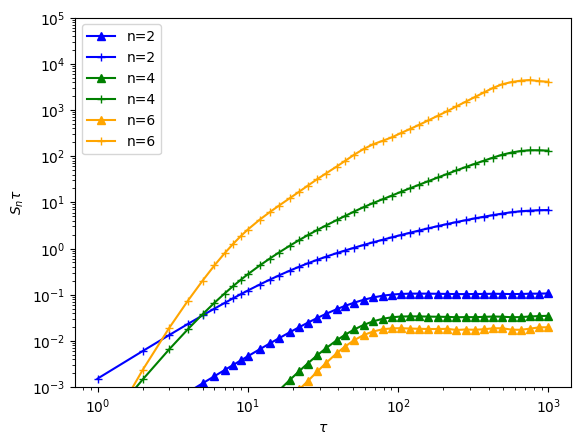

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-4, top=10e4)
ax.set_ylabel(r"$S_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

# create a list of colors for each n
colors = ["blue", "green", "orange"]
for i,n in enumerate(list_n):
    tau, sn_tau = stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, sn_tau = orig_stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## Flatness

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-1, top=10e4)
ax.set_ylabel(r"$F_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

for i,n in enumerate(list_n):
    tau, fn_tau = stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, fn_tau = orig_stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## PDF's

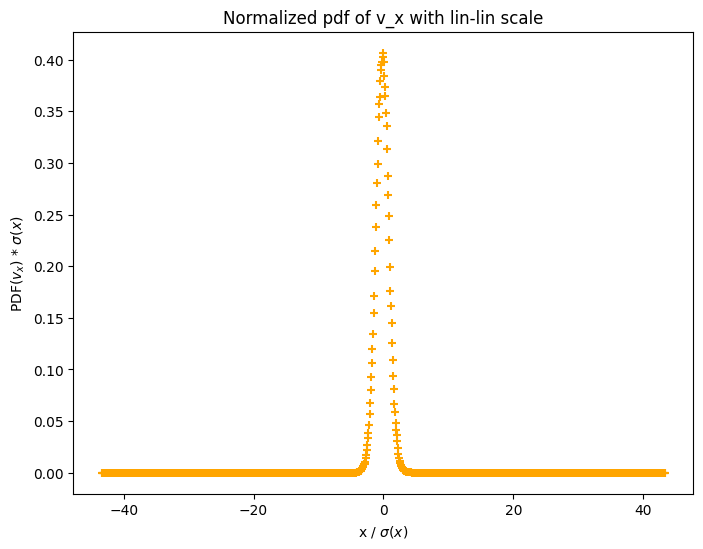

In [32]:
stat.plot_vx_norm_pdf(y_log=False)

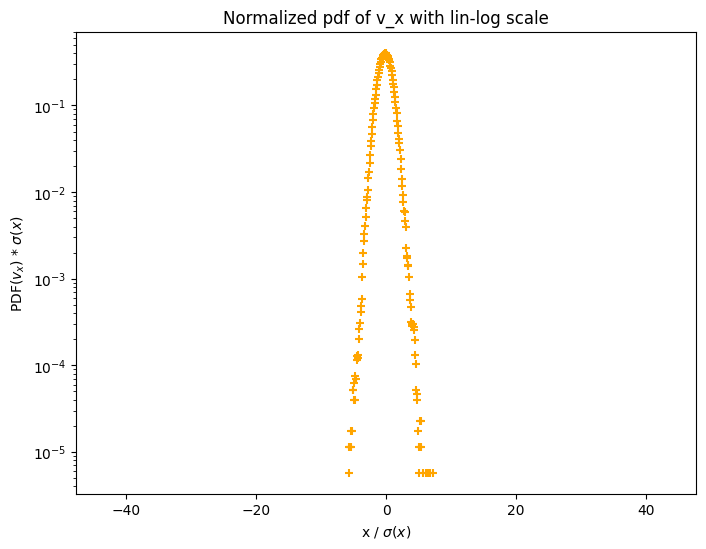

In [33]:
# In log scale
stat.plot_vx_norm_pdf(y_log=True)

<div style="border-bottom: 1px solid black;"></div>

This set corresponds to a model trained for 500K steps, with a learning rate of 1e-05, and with normalization of input data.  
In the inference process, no clamping was performed, only the reverse normalization. Also, fast-sampling was not applied.  
**Experiment code**: 1262377  
**Model code**: weights-20230616-1262377.pt

In [56]:
# Loading the data
filename = "experiment_1262377/generated_samples_slow.npy"

In [57]:
d1 = ParticleDataset(npy_filename=os.path.join(DW_MODELS_PATH, filename), root_dir=".")

Text(0.5, 0, 't')

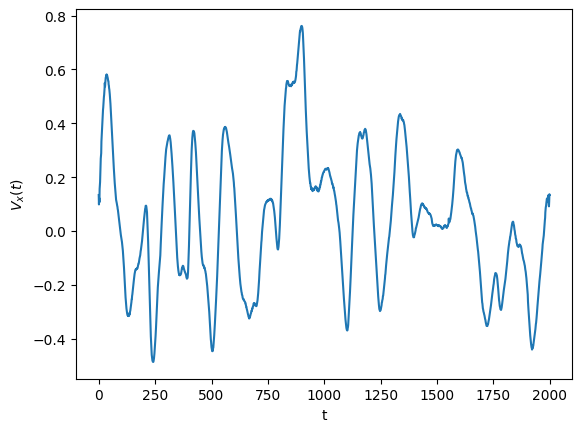

In [36]:
# one sample
sample_1 = d1[10]
plt.plot(np.arange(2000), sample_1[:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")

In [58]:
stat = ds.StatisticalPhysics(d1)

## Lagrangian structures

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-4, top=10e4)
ax.set_ylabel(r"$S_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

# create a list of colors for each n
colors = ["blue", "green", "orange"]
for i,n in enumerate(list_n):
    tau, sn_tau = stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, sn_tau = orig_stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## Flatness

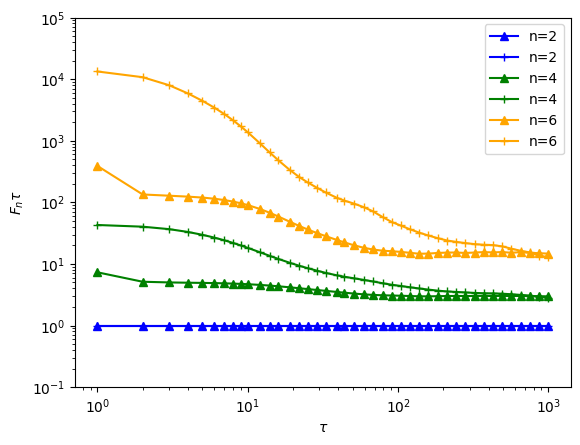

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-2, top=10e4)
ax.set_ylabel(r"$F_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

for i,n in enumerate(list_n):
    tau, fn_tau = stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, fn_tau = orig_stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## PDF's

In [40]:
stat.plot_vx_norm_pdf(y_log=False)

In [41]:
# In log scale
stat.plot_vx_norm_pdf(y_log=True)

<div style="border-bottom: 1px solid black;"></div>

This experiment corresponds to a continuation in training of the last model weights-20230616-1262377.pt, for up to 3M steps.  
In the inference process, no clamping was performed, only the reverse normalization. Also, fast-sampling was not applied.  
**Experiment code**: 1265404  
**Model code**: weights-20230622-1265404.pt

In [68]:
# Loading the data
filename = "experiment_1265404/generated_samples_1d.npy"

In [69]:
d1 = ParticleDataset(npy_filename=os.path.join(DW_MODELS_PATH, filename), root_dir=".")

In [5]:
# one sample
sample_1 = d1[10]
plt.plot(np.arange(2000), sample_1[:,0])
plt.ylabel(r"$V_x(t)$")
plt.xlabel("t")

Text(0.5, 0, 't')

In [70]:
stat = ds.StatisticalPhysics(d1)

### Lagrangian structures

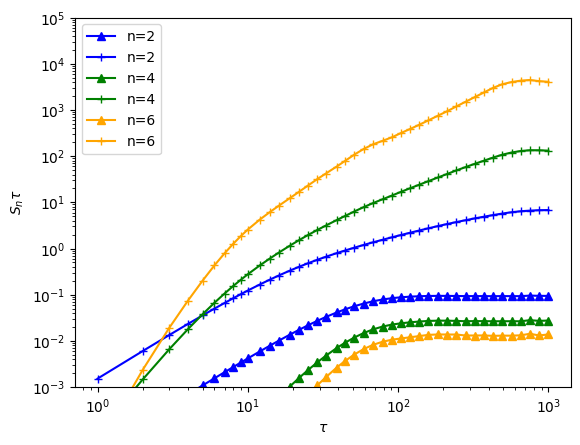

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-4, top=10e4)
ax.set_ylabel(r"$S_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

# create a list of colors for each n
colors = ["blue", "green", "orange"]
for i,n in enumerate(list_n):
    tau, sn_tau = stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, sn_tau = orig_stat.compute_lagrangian_structure_function(n, coordinate=0)
    ax.plot(tau, sn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## Flatness

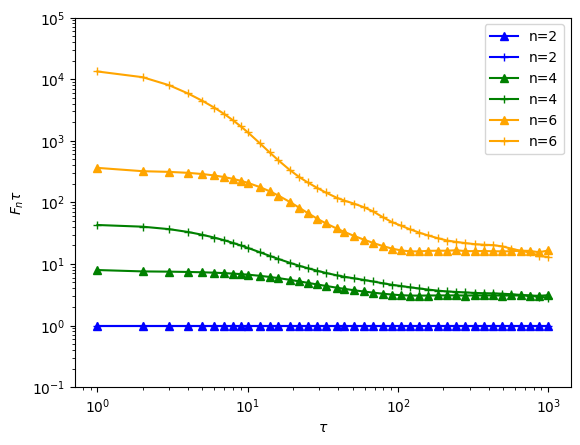

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(bottom=10e-2, top=10e4)
ax.set_ylabel(r"$F_n{\tau}$")
ax.set_xlabel(r"$\tau$")
ax.set_yscale("log")
ax.set_xscale("log")

for i,n in enumerate(list_n):
    tau, fn_tau = stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='^', color=colors[i])
    # Original data will have markers '+'
    tau, fn_tau = orig_stat.compute_flatness_function(n, coordinate=0)
    ax.plot(tau, fn_tau, label=r"n=" + str(n), marker='+', color=colors[i])

plt.legend()
plt.show()

## PDF's

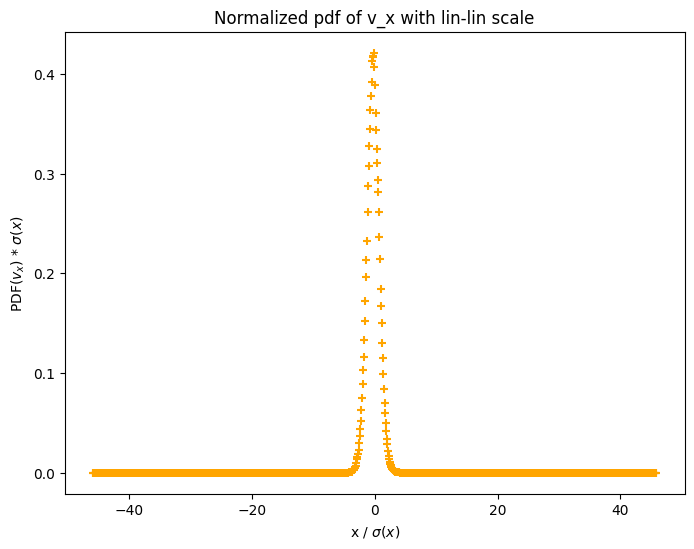

In [11]:
stat.plot_vx_norm_pdf(y_log=False)